In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)
print(keras.__version__)

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2
2.5.0-rc0
2.5.0


In [11]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.datasets import mnist

In [12]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)

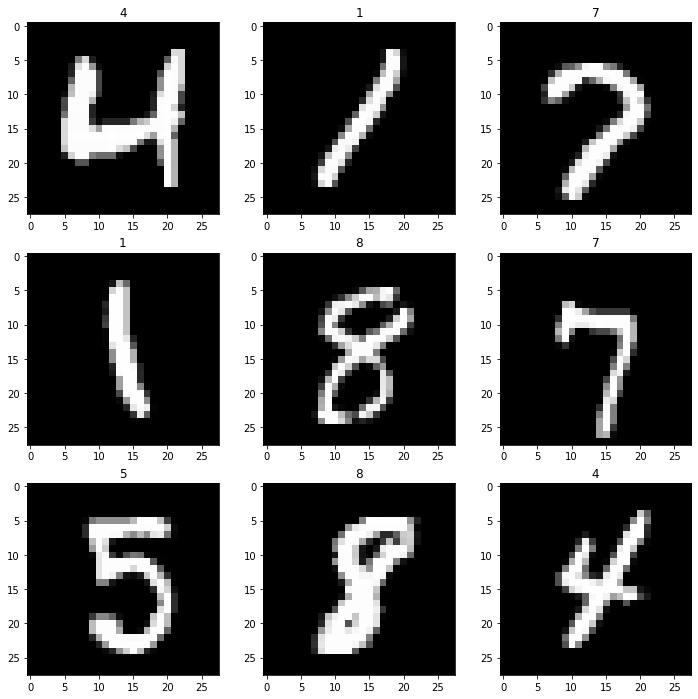

In [13]:
plt.figure(figsize=(12, 12))
np.random.seed(0)
idx = np.random.randint(0, 60000, 9)

for i in range(len(idx)):
    plt.subplot(3, 3, i+1)
    plt.title(y_train[idx[i]])
    grid_data = np.reshape(X_train[idx[i]], (28,28))
    plt.imshow(grid_data, cmap='gray')

In [14]:
# Type Conversion of Columns
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalization
X_train = X_train/255
X_test = X_test/255

# Adding the channel
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [16]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [17]:
model = None
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), padding='same', input_shape=(28, 28, 1), activation='relu', kernel_initializer='he_normal'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=128, epochs=10)

Epoch 1/10
469/469 [==============================] - 169s 356ms/step - loss: 0.5227 - accuracy: 0.8409
Epoch 2/10
469/469 [==============================] - 165s 352ms/step - loss: 0.0971 - accuracy: 0.9710
Epoch 3/10
469/469 [==============================] - 164s 350ms/step - loss: 0.0734 - accuracy: 0.9782
Epoch 4/10
469/469 [==============================] - 163s 349ms/step - loss: 0.0585 - accuracy: 0.9830
Epoch 5/10
469/469 [==============================] - 164s 349ms/step - loss: 0.0433 - accuracy: 0.9864
Epoch 6/10
469/469 [==============================] - 165s 352ms/step - loss: 0.0418 - accuracy: 0.9868
Epoch 7/10
469/469 [==============================] - 163s 347ms/step - loss: 0.0333 - accuracy: 0.9892
Epoch 8/10
469/469 [==============================] - 166s 353ms/step - loss: 0.0309 - accuracy: 0.9903
Epoch 9/10
469/469 [==============================] - 164s 349ms/step - loss: 0.0278 - accuracy: 0.9904
Epoch 10/10
469/469 [==============================] - 166s 355m

In [18]:
prediction_score = model.evaluate(X_test, Y_test, verbose=0)

print('Test Loss and Test Accuracy', prediction_score)

Test Loss and Test Accuracy [0.03177744150161743, 0.9908999800682068]


In [19]:
from tensorflow.keras.preprocessing import image

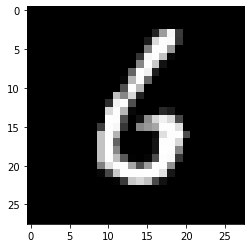

In [21]:
plt.imshow(image.array_to_img(X_test[50]), cmap="gray")

In [22]:
y_test[50]

6

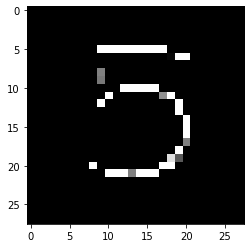

In [35]:
img = image.load_img(path="img1.png", grayscale=True, target_size=(28, 28))
img = image.img_to_array(img)
plt.imshow(image.array_to_img(img), cmap="gray")
img = img.astype('float')/255
test_img = img.reshape((1, 28, 28, 1))
img_class = model.predict_classes(test_img)
prediction = img_class[0]

In [36]:
prediction

5